## Health-Intellect: A Predictive Diabetes Risk Advisor

**Objective:** To analyze health indicators from the BRFSS2015 dataset to identify key factors associated with diabetes and build a predictive model.

**Student:** Abhay Tiwari  
**Motto:** "Converting raw data into valuable insights."

---

### Part 1: Exploratory Data Analysis (EDA)

In this section, we will load the dataset, perform an initial inspection, and create visualizations to understand the relationships between different health indicators and the presence of diabetes.

In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import xgboost as xgb
import shap
import joblib
from scipy.stats import chi2_contingency, ttest_ind


In [2]:
df=pd.read_csv('diabetes_data.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### Analysis of the Target Variable: `Diabetes_binary`

Understanding the distribution of our target variable is the most critical first step in any classification problem. An imbalanced dataset, where one class is much more frequent than the other, can significantly bias the model and requires special techniques to handle.

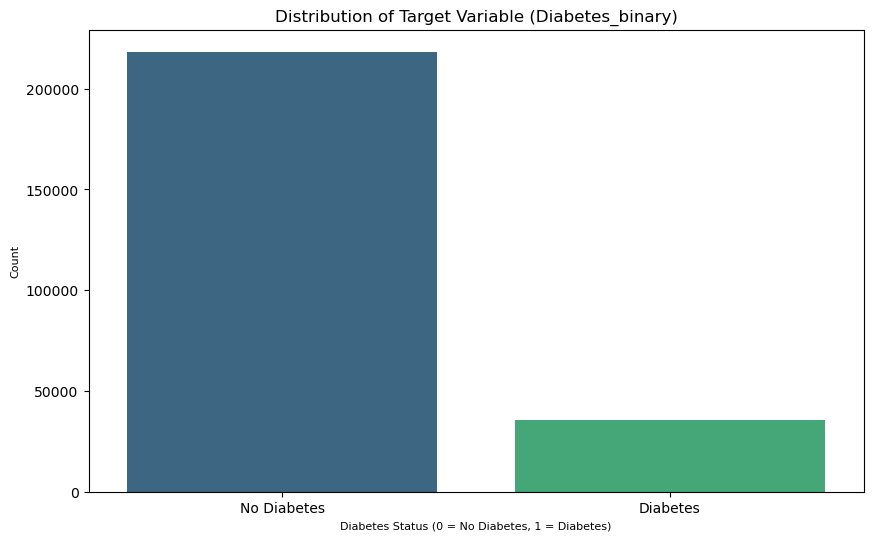

In [6]:
diabetes_counts=df['Diabetes_binary'].value_counts()
diabetes_percentage=df['Diabetes_binary'].value_counts(normalize=True)*100

plt.figure(figsize=(10,6))
ax = sns.countplot(x='Diabetes_binary',data=df,palette="viridis",hue='Diabetes_binary',legend=False)

plt.title('Distribution of Target Variable (Diabetes_binary)',fontsize=12)
plt.xlabel('Diabetes Status (0 = No Diabetes, 1 = Diabetes)',fontsize=8)
plt.ylabel('Count',fontsize=8)
plt.xticks([0,1],['No Diabetes','Diabetes'])
plt.show()

##### Interpretation:

- The dataset is imbalanced. Approximately 86.07% of the individuals in the dataset do not have diabetes, while only 13.93% do.

- This is a crucial finding. Our model might achieve high accuracy by simply predicting "No Diabetes" for everyone. Therefore, we must use evaluation metrics beyond accuracy, such as AUC-ROC, Precision, Recall, and F1-Score, during the modeling phase.



### Univariate Analysis: Understanding Individual Feature Distributions

Let's analyze the key continuous and ordinal features to understand their spread and central tendencies. We'll focus on `BMI`, `GenHlth`, `MentHlth`, and `PhysHlth`.

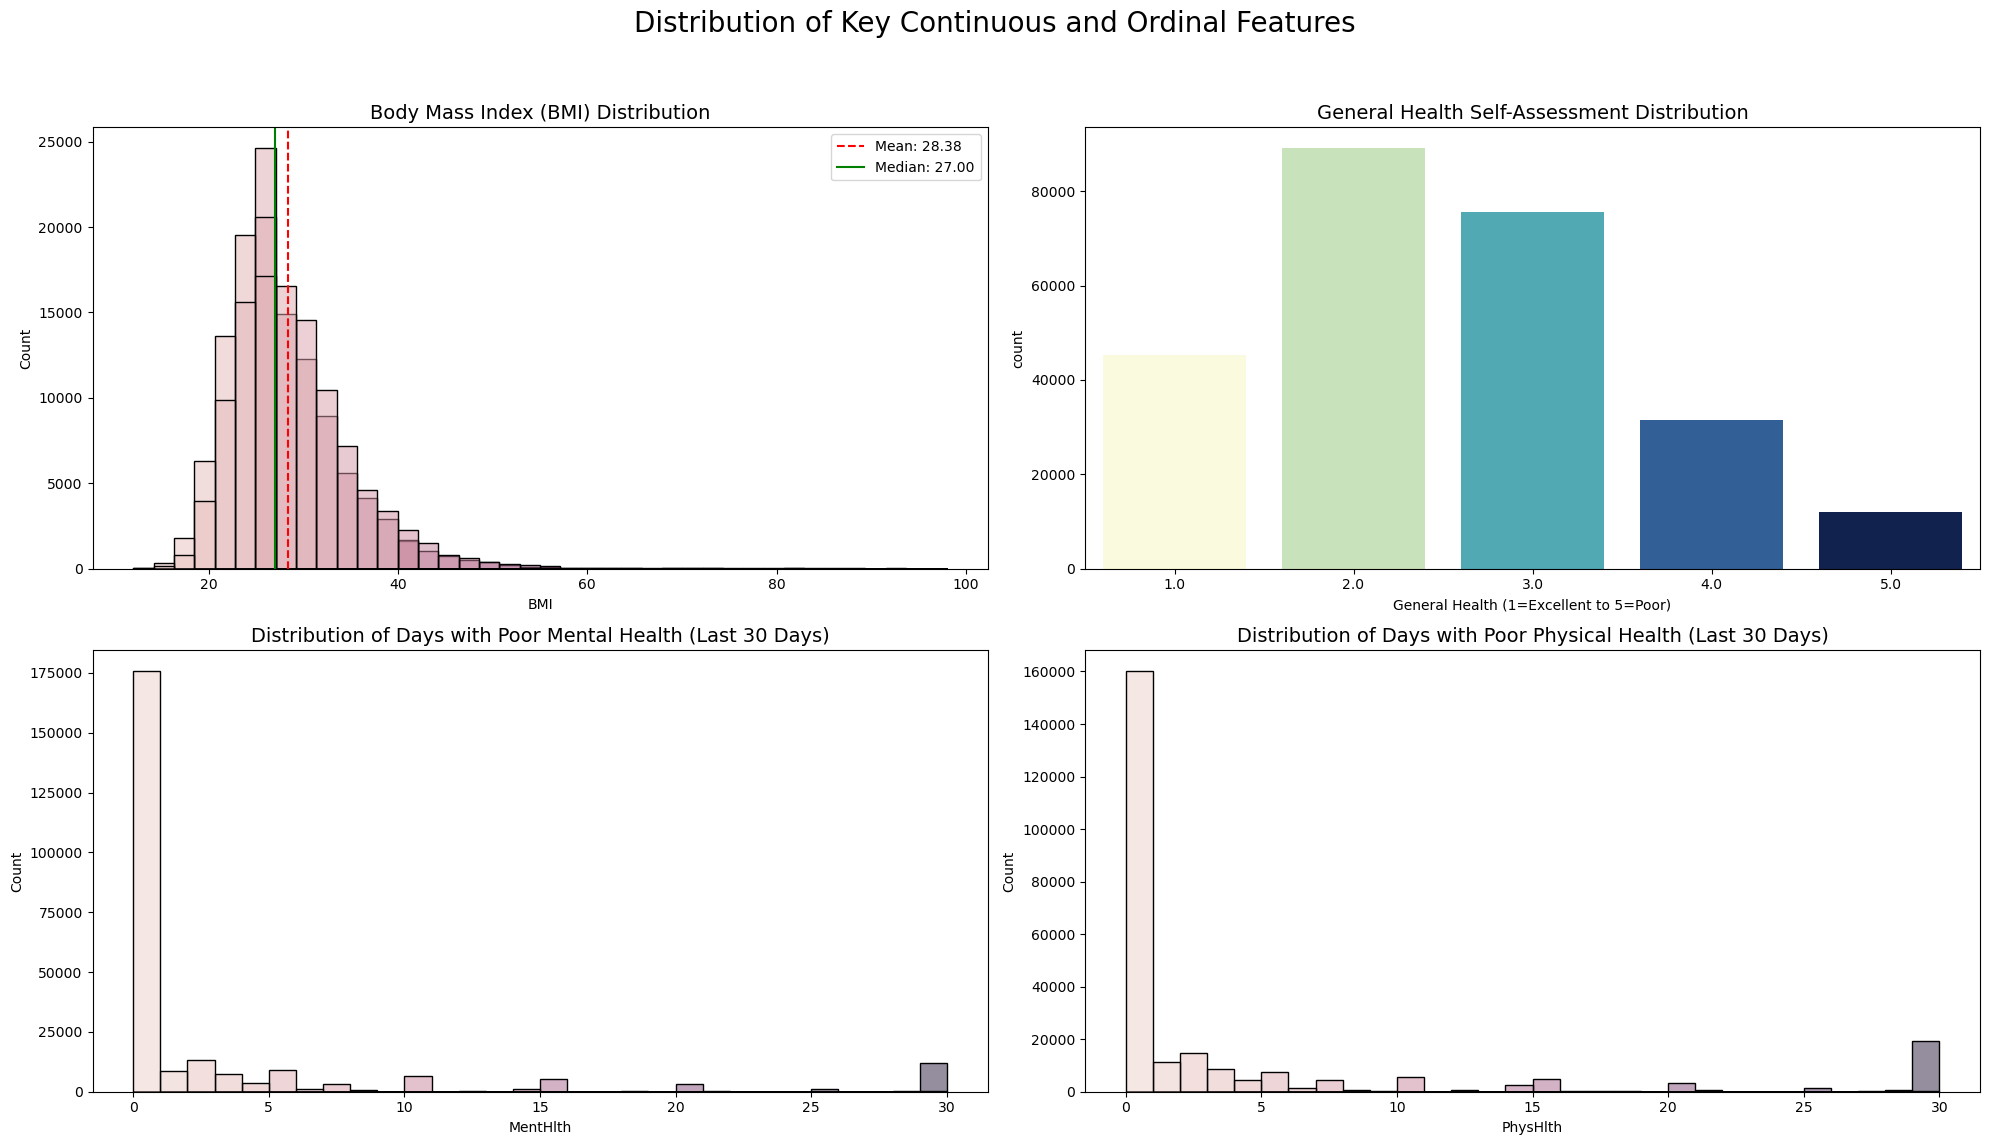

In [7]:
# Create a figure for the subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Distribution of Key Continuous and Ordinal Features', fontsize=20)

# 1. BMI Distribution
sns.histplot(ax=axes[0,0],data=df,x='BMI',kde=True,
             bins=40,color='skyblue',hue='BMI',legend=False)
axes[0, 0].set_title('Body Mass Index (BMI) Distribution', fontsize=14)
axes[0, 0].axvline(df['BMI'].mean(), color='red', linestyle='--', label=f"Mean: {df['BMI'].mean():.2f}")
axes[0, 0].axvline(df['BMI'].median(), color='green', linestyle='-', label=f"Median: {df['BMI'].median():.2f}")
axes[0, 0].legend()

# 2. General Health Distribution
sns.countplot(ax=axes[0,1],data=df,x='GenHlth',palette='YlGnBu',hue='GenHlth',legend=False)
axes[0, 1].set_title('General Health Self-Assessment Distribution', fontsize=14)
axes[0, 1].set_xlabel('General Health (1=Excellent to 5=Poor)')

# 3. Mental Health Days Distribution
sns.histplot(ax=axes[1,0],data=df,x='MentHlth',bins=30,color='salmon',hue='MentHlth',legend=False)
axes[1, 0].set_title('Distribution of Days with Poor Mental Health (Last 30 Days)', fontsize=14)

# 4. Physical Health Days Distribution
sns.histplot(ax=axes[1,1],data=df,x='PhysHlth',bins=30,color='red',hue='PhysHlth',legend=False)
axes[1, 1].set_title('Distribution of Days with Poor Physical Health (Last 30 Days)', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### Interpretation:

- BMI: The distribution is right-skewed. The mean (28.38) is slightly higher than the median (27.0), indicating some individuals with very high BMIs. Most people are in the 20-35 range.

- General Health: This is an ordinal feature. The majority of respondents rate their health as "Very Good" (2) or "Good" (3).

- Mental & Physical Health: Both distributions are heavily skewed towards 0, meaning most people reported 0 days of poor mental or physical health in the last 30 days. However, there's a notable number of people who reported all 30 days as being poor.

#### Bivariate Analysis: Feature vs. Target

This is where we hunt for the most impactful insights. How do individual health indicators relate to the likelihood of having diabetes? We will investigate the strongest predictors identified in our initial analysis.

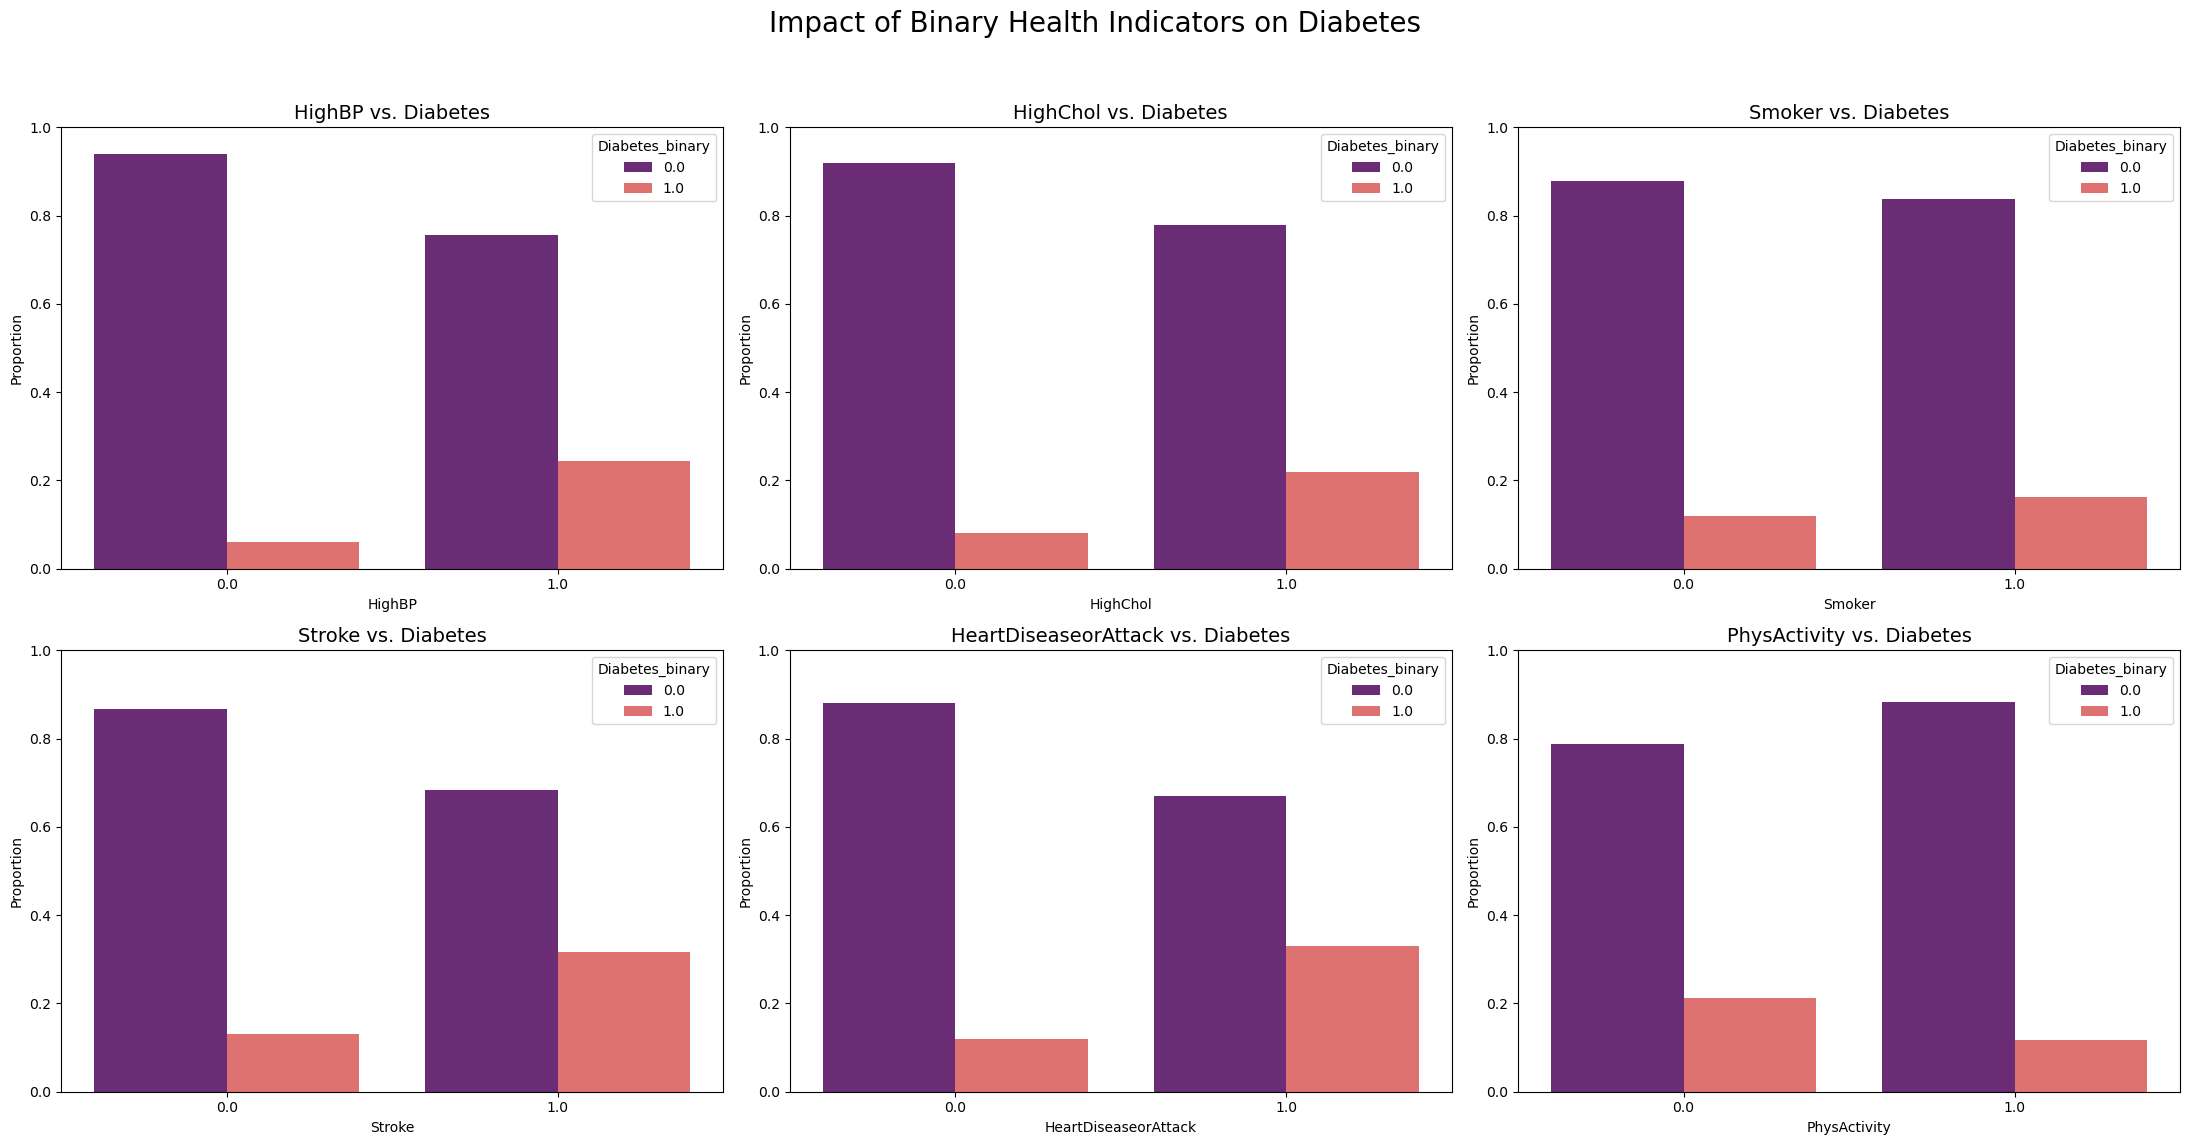

In [10]:
binary_features=['HighBP','HighChol','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity']

fig,axes=plt.subplots(2,3,figsize=(22,12))
fig.suptitle('Impact of Binary Health Indicators on Diabetes',fontsize=20)
axes=axes.flatten()

for i,col in enumerate(binary_features):
    prop_df=(df.groupby([col])['Diabetes_binary']
               .value_counts(normalize=True)
               .rename('percent')
               .reset_index())
    
    sns.barplot(ax=axes[i],x=col,y='percent',hue='Diabetes_binary',data=prop_df,palette='magma')
    axes[i].set_title(f'{col} vs. Diabetes', fontsize=14)
    axes[i].set_ylim(0,1)
    axes[i].set_ylabel('Proportion')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### Interpretation:

- This plot is extremely insightful. Instead of raw counts, we are looking at proportions.

- HighBP & HighChol: The proportion of people with diabetes is dramatically higher in the group that has high blood pressure and high cholesterol. These are clearly very strong indicators.

- HeartDiseaseorAttack & Stroke: Similarly, a history of these conditions is strongly associated with a higher proportion of diabetes cases.

- Smoker & PhysActivity: The relationship is present but less pronounced than for the cardiovascular indicators.



#### Multivariate Analysis: The Big Picture

A correlation heatmap provides a comprehensive overview of the linear relationships between all numerical variables in the dataset. We'll look for:
1.  Features highly correlated with `Diabetes_binary` (our target).
2.  Features that are highly correlated with each other (multicollinearity), which can sometimes be redundant for certain model types.

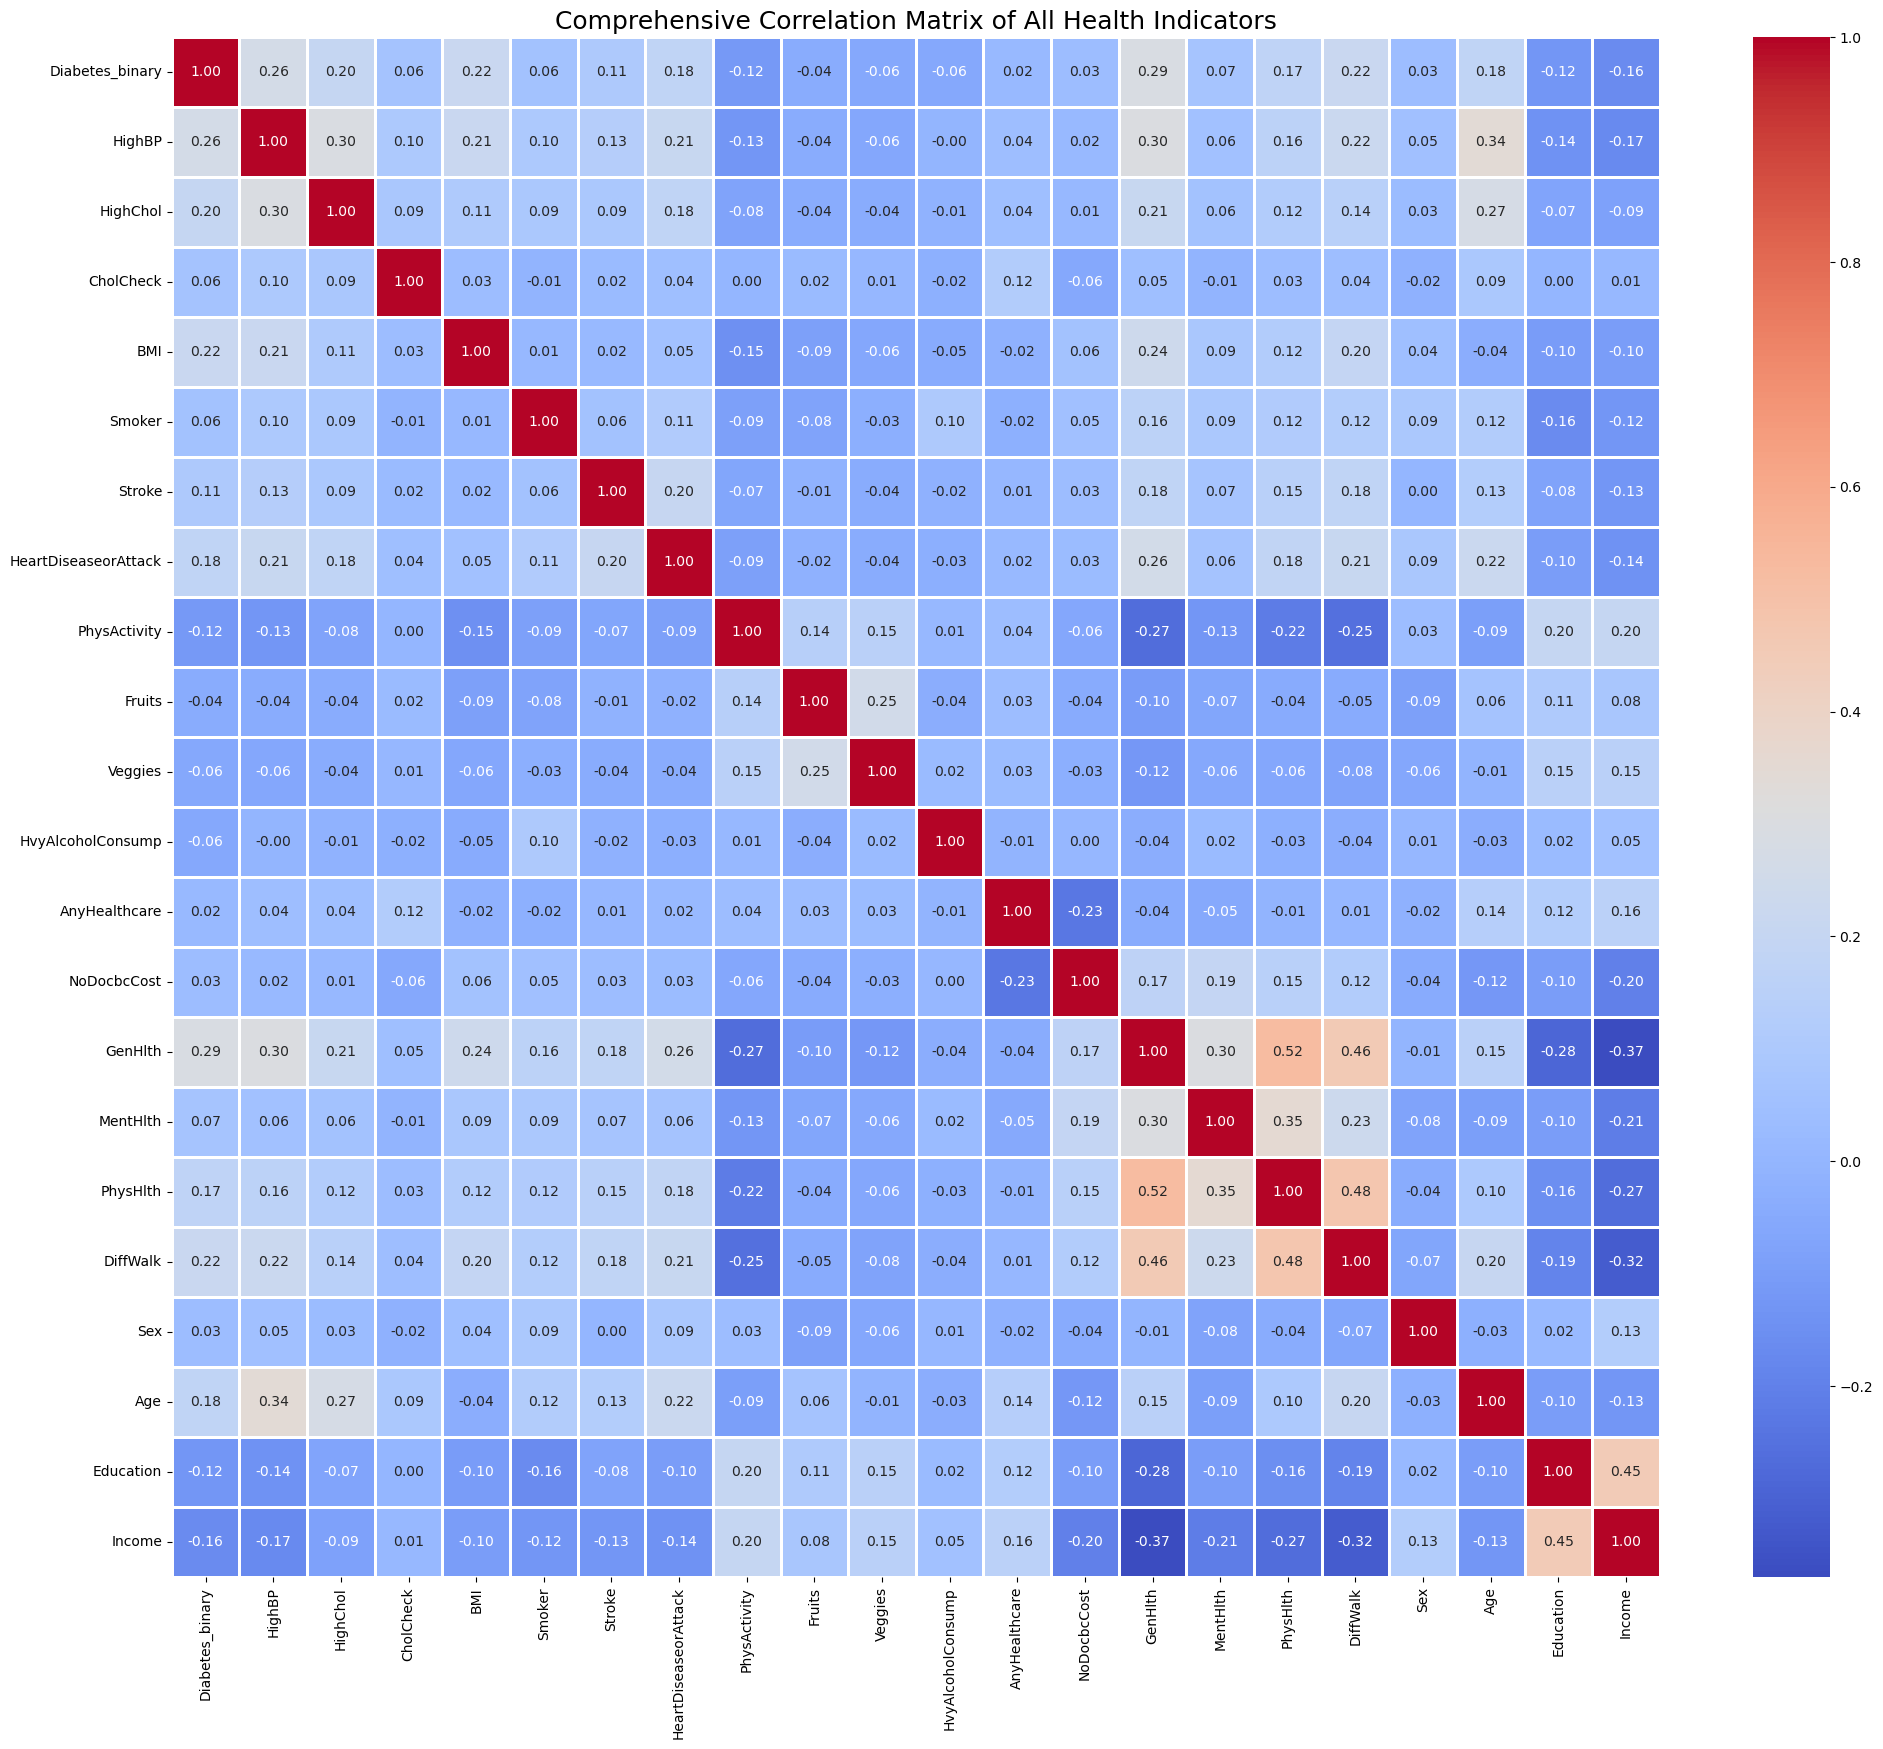

In [12]:
plt.figure(figsize=(24,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=2)
plt.title('Comprehensive Correlation Matrix of All Health Indicators', fontsize=18)
plt.show()

##### Interpretation:

- Top Correlations with `Diabetes_binary`:

- `GenHlth` (0.29): This is the strongest single predictor. As general health worsens, the likelihood of diabetes increases.

- `HighBP` (0.26): Confirms our bivariate analysis.

- `BMI` (0.22): Higher BMI is strongly associated with diabetes.

- `Age` (0.18): Older age is a significant factor.

- `HighChol` (0.20): Also a strong predictor.

- Multicollinearity: Notice the strong correlation between `GenHlth` and `PhysHlth` (0.52), and between `HighBP` and `HighChol` (0.30). This makes sense intuitively. While not problematic for tree-based models like Random Forest, it's something to be aware of for linear models.

#### Feature Engineering - Creating Insightful New Variables

To better capture the overall health status of an individual, we can create composite features from the existing ones. This can often lead to more powerful and interpretable models.

In [ ]:
# Combining poor mental and physical health days
df['UnhealthyDays']=df['MentHlth']+df['PhysHlth']

# 'HealthScore' - a composite score based on major risk factors
df['HealthScore']=df['HighBP']+df['HighChol']+df['Smoker']+df['Stroke']+df['HeartDiseaseorAttack']+df['DiffWalk']

# 'BMICategory' based on standard health guidelines
def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMICategory']=df['BMI'].apply(get_bmi_category)

print("--- Newly Engineered Features ---")
display(df[['UnhealthyDays','HealthScore','BMICategory']].head())

--- Newly Engineered Features ---


,UnhealthyDays,HealthScore,BMICategory
0,33.0,4.0,Obese
1,0.0,1.0,Overweight
2,60.0,3.0,Overweight
3,0.0,1.0,Overweight
4,3.0,2.0,Normal


##### Interpretation:
By creating these new features, we've condensed information into more powerful indicators. `HealthScore`, for example, gives us a single number to represent a person's cumulative risk from major conditions.

#### Advanced Visualization - Violin Plots & Interaction Analysis

Violin plots are superior to box plots as they show the probability density of the data at different values. We'll also create a pivot table heatmap to analyze the interaction between two key predictors.

C:\Users\mahes\AppData\Local\Temp\ipykernel_9048\1253658475.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No Diabetes','Diabetes'])
C:\Users\mahes\AppData\Local\Temp\ipykernel_9048\1253658475.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No Diabetes','Diabetes'])


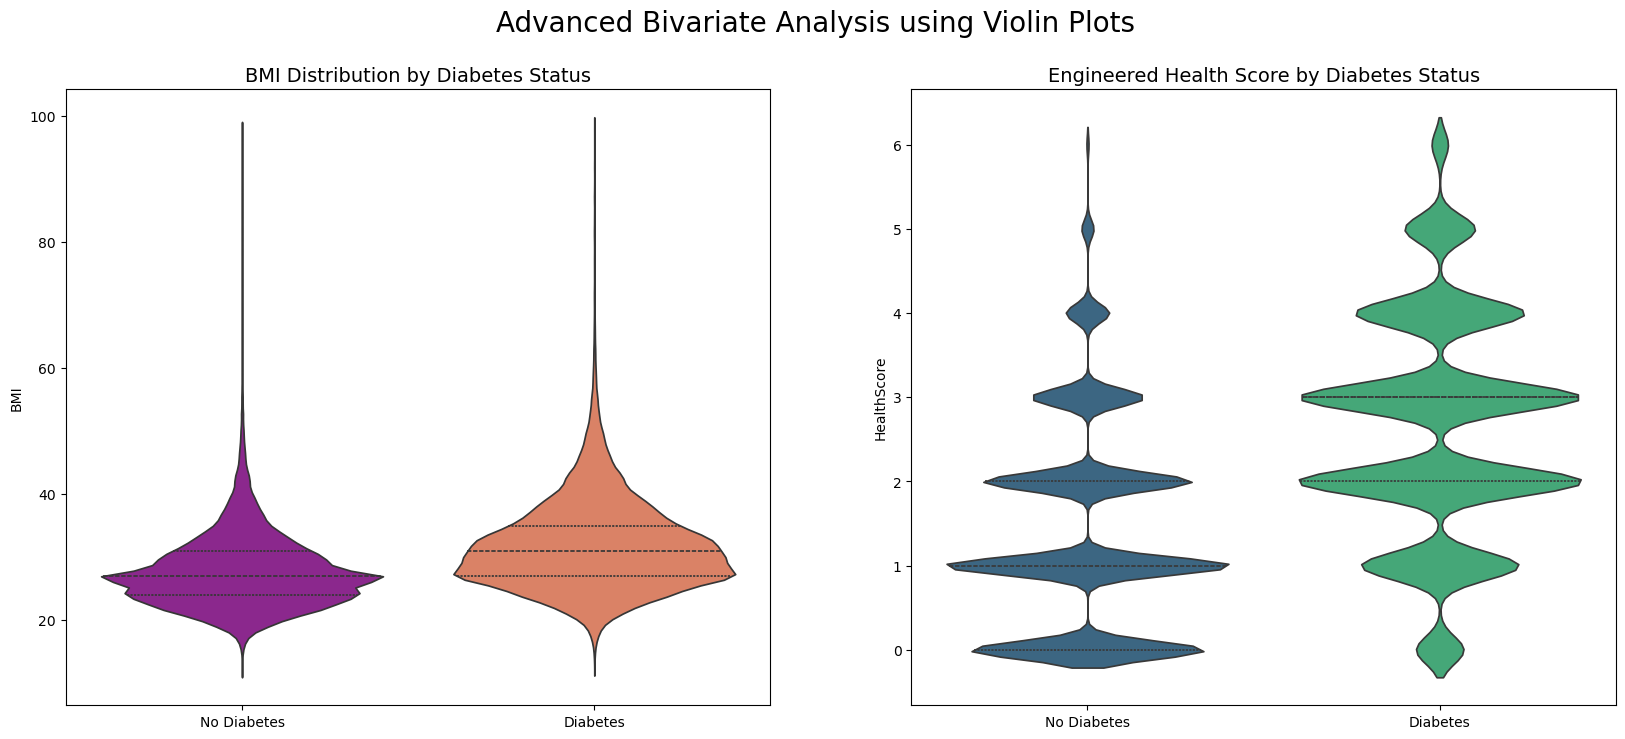

In [18]:
fig,axes=plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Advanced Bivariate Analysis using Violin Plots',fontsize=20)

sns.violinplot(ax=axes[0],data=df,x='Diabetes_binary',y='BMI',
               palette='plasma',inner='quartile',hue='Diabetes_binary',legend=False)
axes[0].set_title('BMI Distribution by Diabetes Status',fontsize=14)
axes[0].set_xticklabels(['No Diabetes','Diabetes'])
axes[0].set_xlabel('')

sns.violinplot(ax=axes[1],data=df,x='Diabetes_binary',y='HealthScore',
               palette='viridis',inner='quartile',hue='Diabetes_binary',legend=False)
axes[1].set_title('Engineered Health Score by Diabetes Status',fontsize=14)
axes[1].set_xticklabels(['No Diabetes','Diabetes'])
axes[1].set_xlabel('')

plt.show()